# Using the remove_lightleak function to analyze XRT composite images

[xrt.cfa.harvard.edu]:https://xrt.cfa.harvard.edu/data_products/index.php

The `remove_lightleak` function is built to subtract light leak (visible stray light) image from XRT synoptic composite images. Level two synoptic composite image data is available at [xrt.cfa.harvard.edu]. This template will guide you through the method of using `remove_lightleak`.

Begin by importing `remove_lightleak` function from XRTpy.

In [1]:
from xrtpy.image_correction.remove_lightleak import remove_lightleak

In [2]:
import pkg_resources
import sunpy.map

from pathlib import Path

/tmp/ipykernel_22880/2480642862.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


This is example will be using XRT synoptic data from the first day of summer of 2015. 

In [3]:
directory = pkg_resources.resource_filename(
    "xrtpy", "image_correction/data/example_data"
)
data_file = Path(directory) / "comp_XRT20150621_055911.7.fits"

print("File used:\n", data_file.name)

File used:
 comp_XRT20150621_055911.7.fits


[Sunpy maps]:https://docs.sunpy.org/en/stable/code_ref/map.html

Take on [Sunpy maps] to run the composite data file. 

In [4]:
in_map = sunpy.map.Map(data_file)

[Sunpy maps]:https://docs.sunpy.org/en/stable/code_ref/map.html

The `remove_lightleak` function takes a `sunpy.map.Map` as input and returns the composite image and metadata as a `Map`.

In [5]:
out_map = remove_lightleak(in_map)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

xrtpy.term_p2am_20150718_160913.fits:   0%|          | 0.00/4.21M [00:00<?, ?B/s]

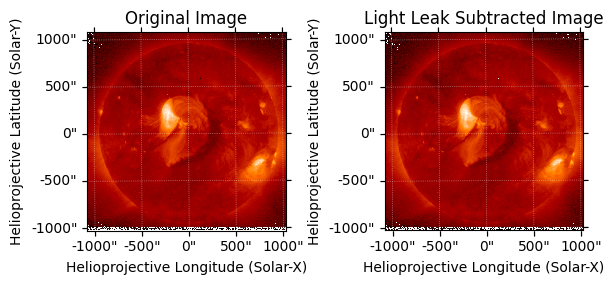

In [6]:
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection=in_map)
in_map.plot(axes=ax1, title="Original Image", norm=LogNorm(1.0, None))
ax2 = fig.add_subplot(1, 2, 2, projection=out_map)
out_map.plot(axes=ax2, title="Light Leak Subtracted Image", norm=LogNorm(1.0, None))
fig.subplots_adjust(wspace=0.5)
plt.show()